<a href="https://colab.research.google.com/github/ulrikSebastienR/Colab-python-diaries/blob/master/Decision_tree_wes_doyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Wes Doyle https://www.youtube.com/watch?v=XDbj6PxaSf0&t=179s

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import graphviz
import pydotplus
import io

In [0]:
from scipy import misc

In [84]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spotifydata.csv to spotifydata (1).csv
User uploaded file "spotifydata.csv" with length 222579 bytes


In [85]:
data = pd.read_csv('spotifydata (1).csv')
print(data)

      Unnamed: 0  ...            artist
0              0  ...            Future
1              1  ...  Childish Gambino
2              2  ...            Future
3              3  ...       Beach House
4              4  ...       Junior Boys
...          ...  ...               ...
2012        2012  ...    Kill The Noise
2013        2013  ...    Dillon Francis
2014        2014  ...          Rain Man
2015        2015  ...        Twin Moons
2016        2016  ...         Bleachers

[2017 rows x 17 columns]


In [86]:
print(data.head())

   Unnamed: 0  acousticness  ...      song_title            artist
0           0        0.0102  ...        Mask Off            Future
1           1        0.1990  ...         Redbone  Childish Gambino
2           2        0.0344  ...    Xanny Family            Future
3           3        0.6040  ...  Master Of None       Beach House
4           4        0.1800  ...  Parallel Lines       Junior Boys

[5 rows x 17 columns]


In [87]:
print(data.columns)

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


In [88]:
print(data['target'])

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64


In [89]:
print(data['target']==1)

0        True
1        True
2        True
3        True
4        True
        ...  
2012    False
2013    False
2014    False
2015    False
2016    False
Name: target, Length: 2017, dtype: bool


In [90]:
print(data[data['target']==1])

      Unnamed: 0  acousticness  ...        song_title            artist
0              0        0.0102  ...          Mask Off            Future
1              1        0.1990  ...           Redbone  Childish Gambino
2              2        0.0344  ...      Xanny Family            Future
3              3        0.6040  ...    Master Of None       Beach House
4              4        0.1800  ...    Parallel Lines       Junior Boys
...          ...           ...  ...               ...               ...
1015        1015        0.2580  ...  6 In The Morning             Wiley
1016        1016        0.0103  ...  Skepta Interlude             Drake
1017        1017        0.3290  ...    Man Don't Care               Jme
1018        1018        0.3500  ...         Luke Cage         AJ Tracey
1019        1019        0.1000  ...          Shutdown            Skepta

[1020 rows x 17 columns]


In [91]:
print(data['target']==0)

0       False
1       False
2       False
3       False
4       False
        ...  
2012     True
2013     True
2014     True
2015     True
2016     True
Name: target, Length: 2017, dtype: bool


In [92]:
print(data[data['target']==1])

      Unnamed: 0  acousticness  ...        song_title            artist
0              0        0.0102  ...          Mask Off            Future
1              1        0.1990  ...           Redbone  Childish Gambino
2              2        0.0344  ...      Xanny Family            Future
3              3        0.6040  ...    Master Of None       Beach House
4              4        0.1800  ...    Parallel Lines       Junior Boys
...          ...           ...  ...               ...               ...
1015        1015        0.2580  ...  6 In The Morning             Wiley
1016        1016        0.0103  ...  Skepta Interlude             Drake
1017        1017        0.3290  ...    Man Don't Care               Jme
1018        1018        0.3500  ...         Luke Cage         AJ Tracey
1019        1019        0.1000  ...          Shutdown            Skepta

[1020 rows x 17 columns]


In [93]:
print(data[data['target']==0])

      Unnamed: 0  ...            artist
1020        1020  ...    Zac Brown Band
1021        1021  ...       Chris Young
1022        1022  ...       Brett Young
1023        1023  ...  Kelsea Ballerini
1024        1024  ...      Thomas Rhett
...          ...  ...               ...
2012        2012  ...    Kill The Noise
2013        2013  ...    Dillon Francis
2014        2014  ...          Rain Man
2015        2015  ...        Twin Moons
2016        2016  ...         Bleachers

[997 rows x 17 columns]


In [94]:
print((data[data['target']==0]).head())

      Unnamed: 0  acousticness  ...         song_title            artist
1020        1020      0.819000  ...         My Old Man    Zac Brown Band
1021        1021      0.067700  ...       Losing Sleep       Chris Young
1022        1022      0.013000  ...  Sleep Without You       Brett Young
1023        1023      0.231000  ...           Yeah Boy  Kelsea Ballerini
1024        1024      0.000907  ...        Craving You      Thomas Rhett

[5 rows x 17 columns]


In [95]:
print(data[data['target']==0],['tempo'])
print(type(data[data['target']==1]))
print(type(data[data['target']==1]['tempo'])) 

      Unnamed: 0  ...            artist
1020        1020  ...    Zac Brown Band
1021        1021  ...       Chris Young
1022        1022  ...       Brett Young
1023        1023  ...  Kelsea Ballerini
1024        1024  ...      Thomas Rhett
...          ...  ...               ...
2012        2012  ...    Kill The Noise
2013        2013  ...    Dillon Francis
2014        2014  ...          Rain Man
2015        2015  ...        Twin Moons
2016        2016  ...         Bleachers

[997 rows x 17 columns] ['tempo']
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [96]:
print((data[data['target']==0]['tempo']).head()) 

1020    143.919
1021     92.003
1022     88.541
1023     88.965
1024    104.986
Name: tempo, dtype: float64


In [0]:
train,test = train_test_split(data,test_size = 0.15) 

In [98]:
print("Training Size: {}; Test Size: {}".format(len(train), len(test)))

Training Size: 1714; Test Size: 303


In [0]:
red_blue = ["#1985FE","#EF4836"]

In [100]:
print(red_blue)
print(type(red_blue))

['#1985FE', '#EF4836']
<class 'list'>


In [0]:
palette = sns.color_palette(red_blue)

In [102]:
print(type(palette))
print(palette)

<class 'seaborn.palettes._ColorPalette'>
[(0.09803921568627451, 0.5215686274509804, 0.996078431372549), (0.9372549019607843, 0.2823529411764706, 0.21176470588235294)]


In [103]:
palette

[(0.09803921568627451, 0.5215686274509804, 0.996078431372549),
 (0.9372549019607843, 0.2823529411764706, 0.21176470588235294)]

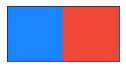

In [104]:
sns.palplot(palette)

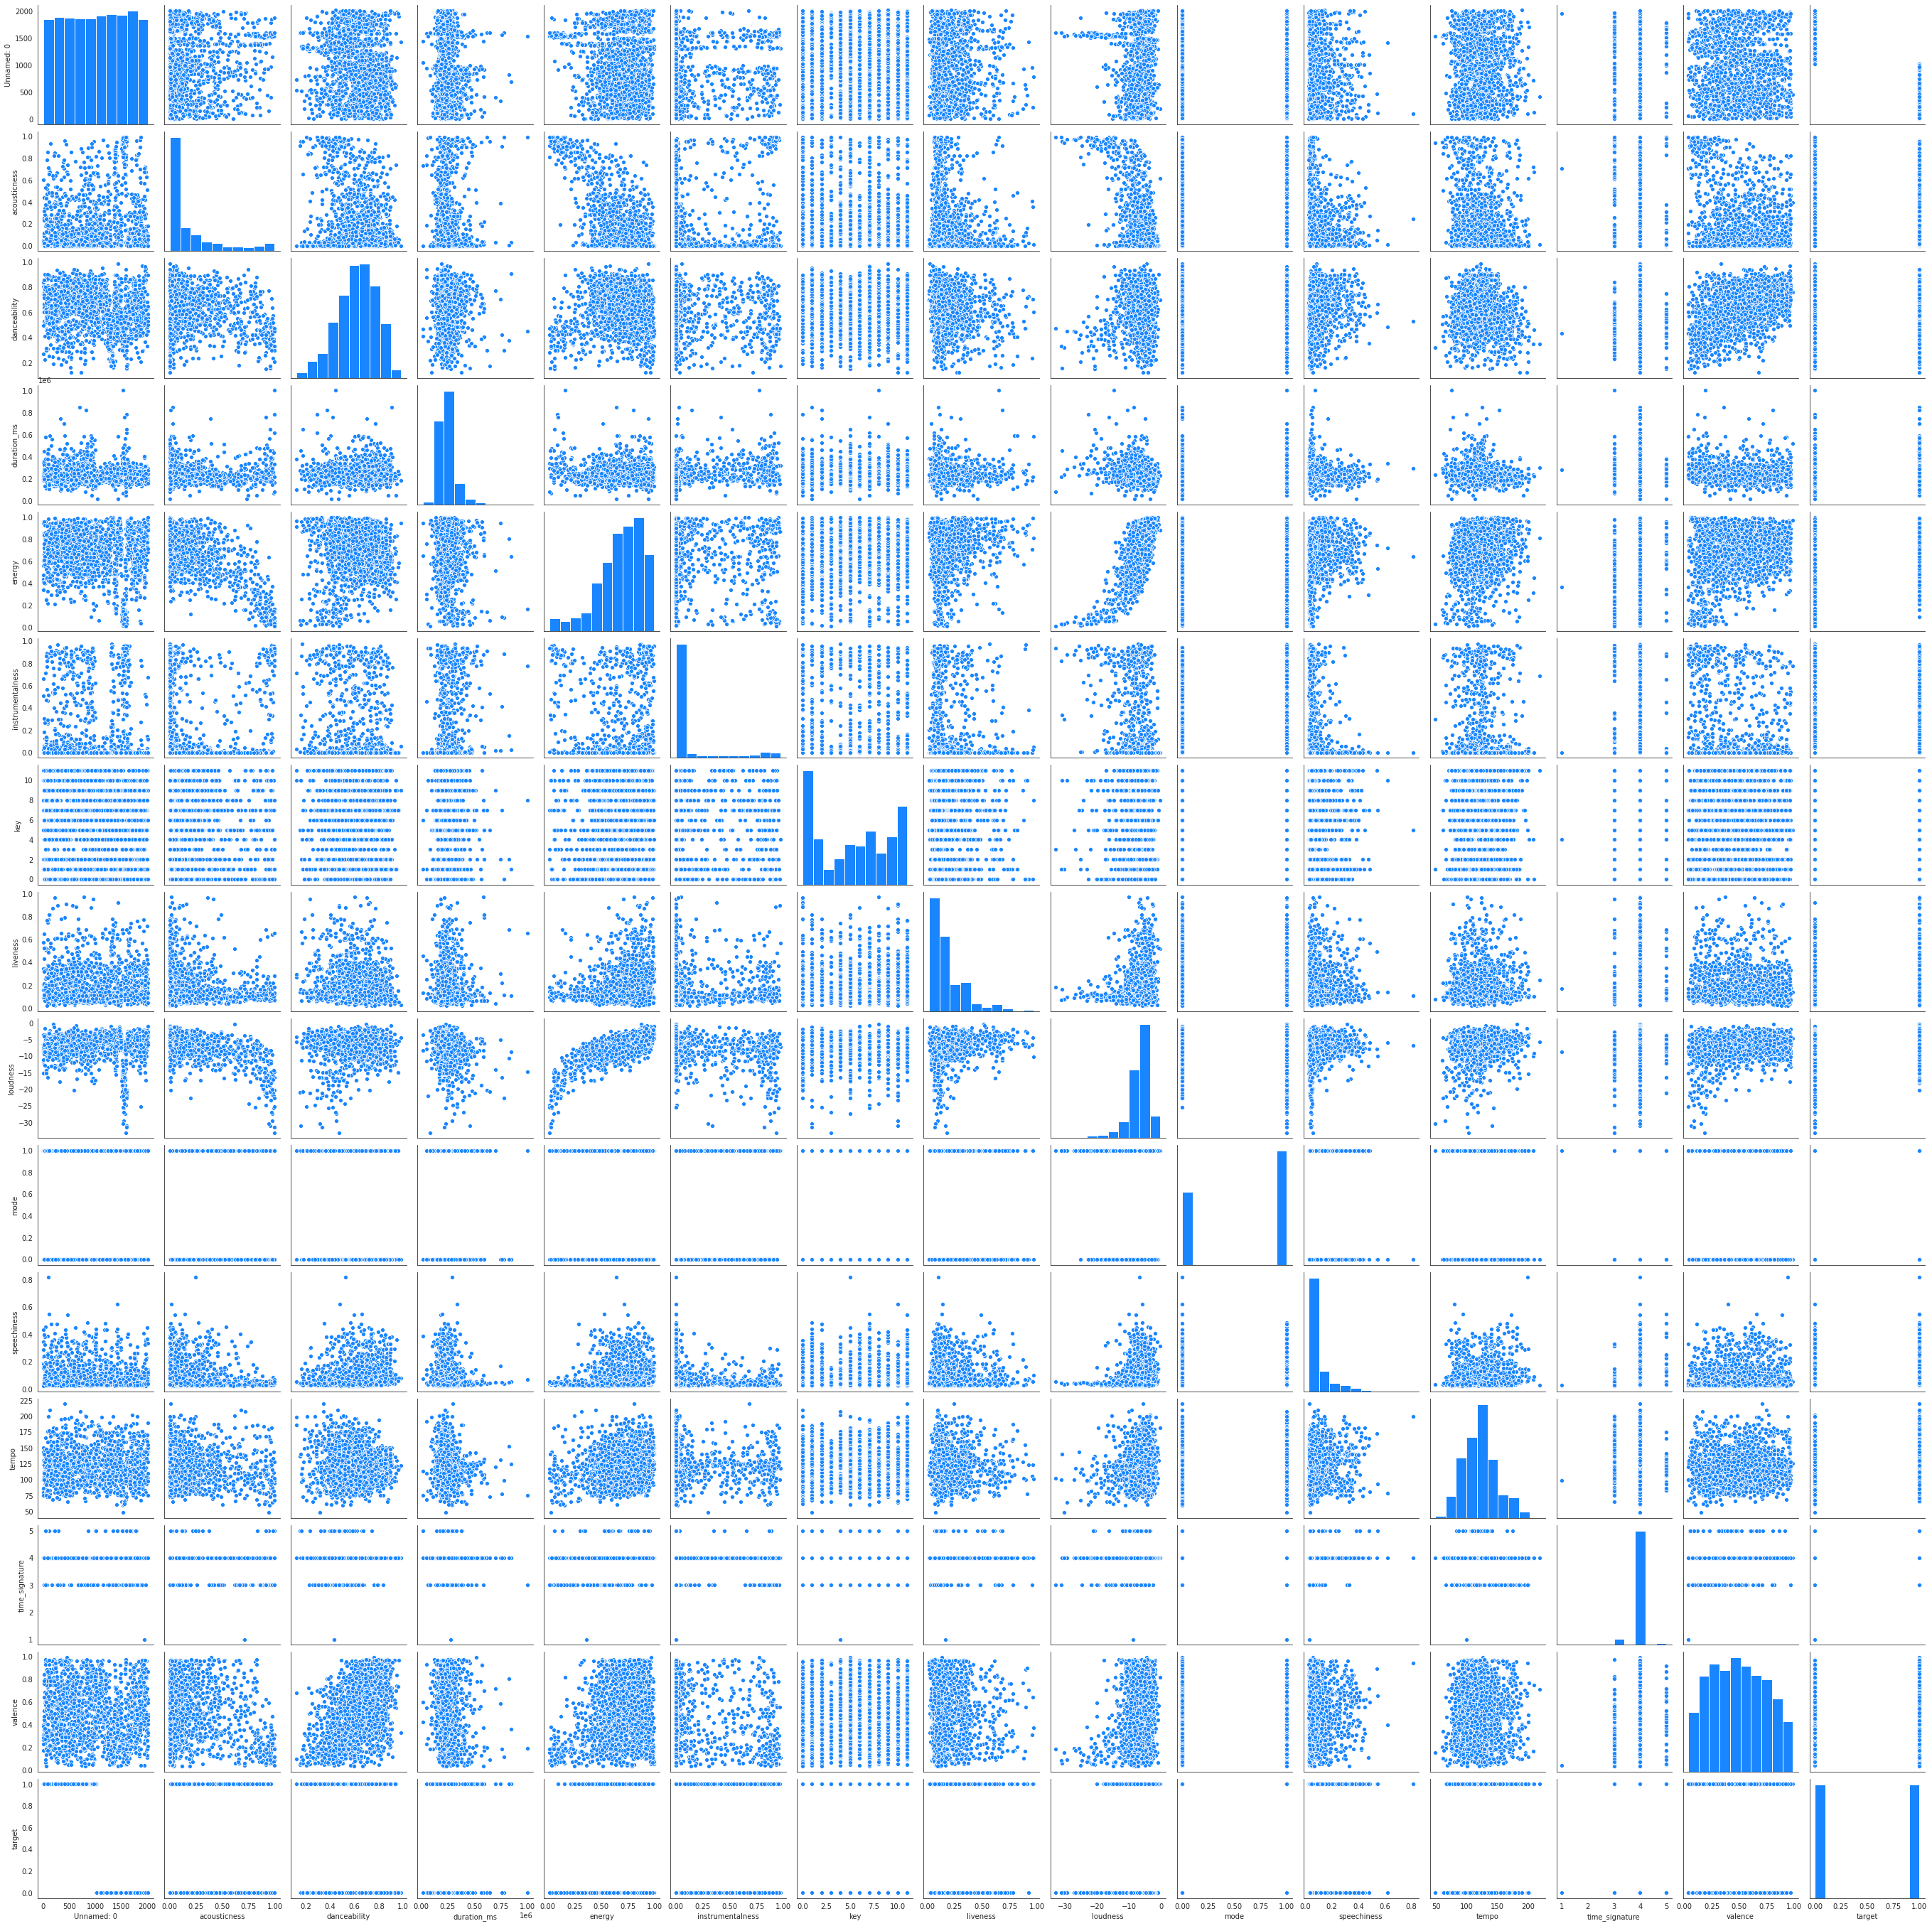

In [105]:
sns.pairplot(train)

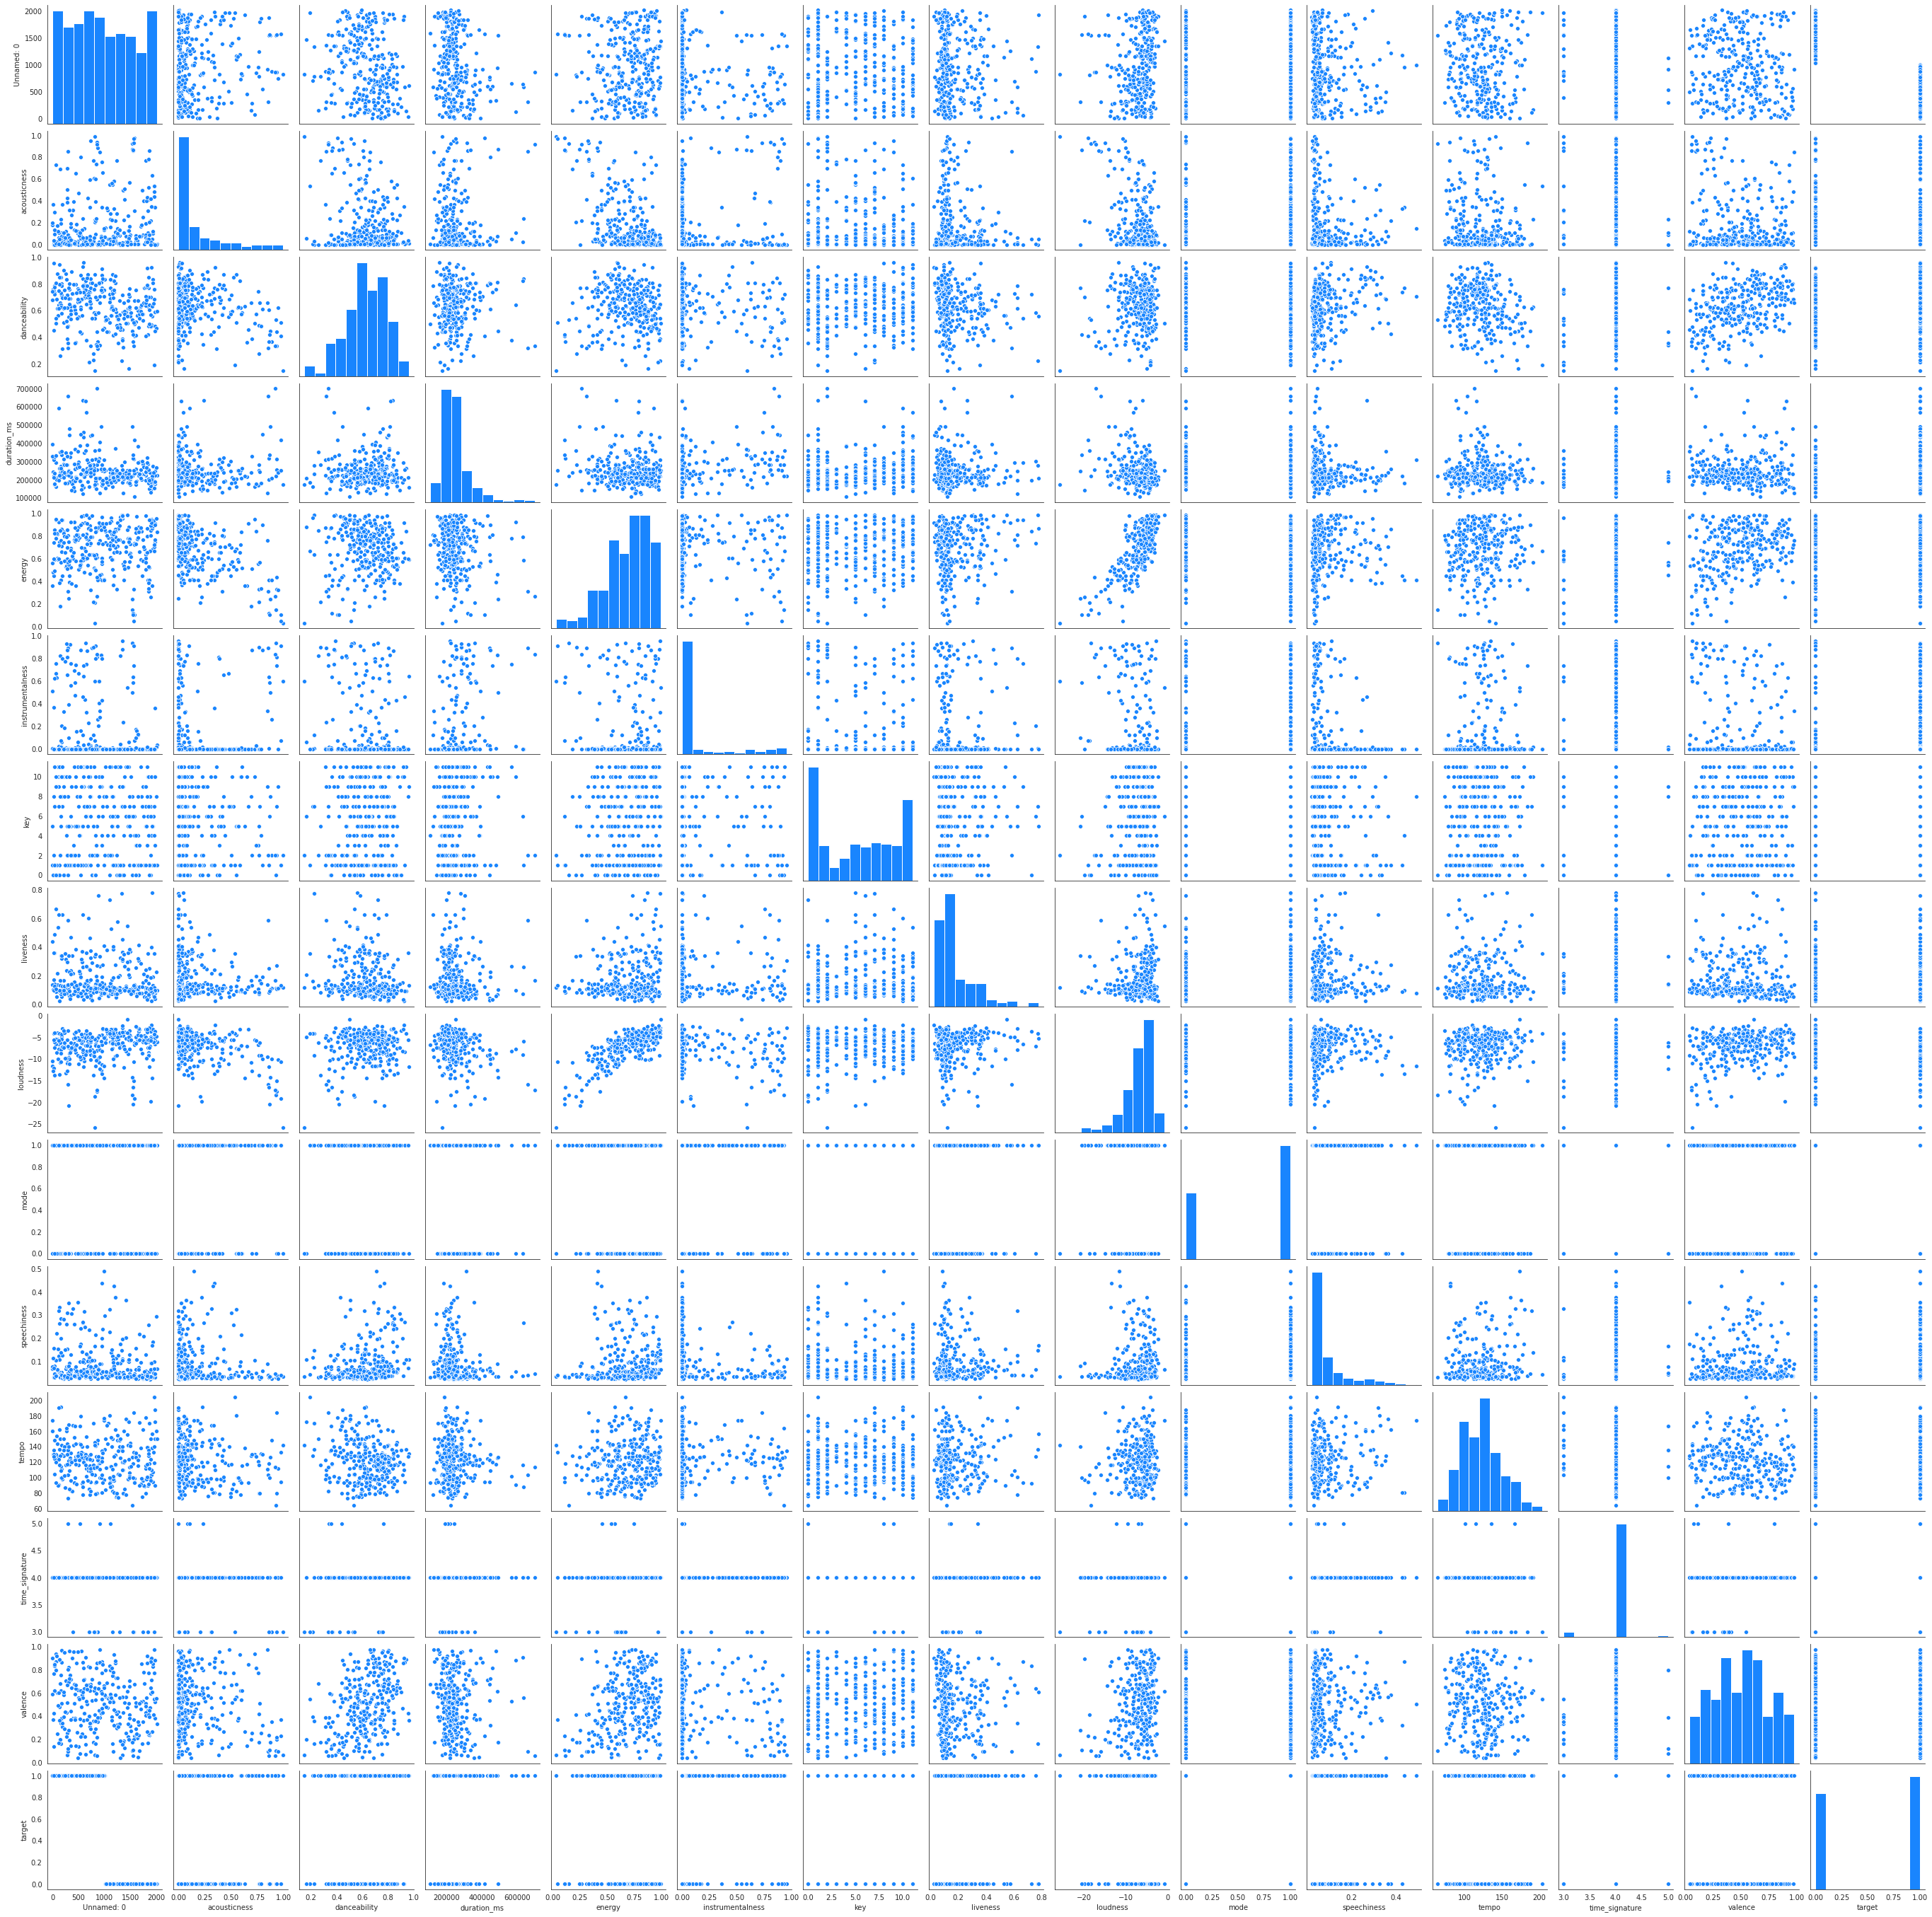

In [106]:
sns.pairplot(test)

In [0]:
sns.set_palette(palette)
sns.set_style('white')

In [0]:
pos_tempo = data[data['target']==1]['tempo']

In [109]:
print(pos_tempo)

0       150.062
1       160.083
2        75.044
3        86.468
4       174.004
         ...   
1015    139.997
1016     86.733
1017    140.008
1018    147.072
1019    107.039
Name: tempo, Length: 1020, dtype: float64


In [110]:
print(type(pos_tempo))

<class 'pandas.core.series.Series'>


In [111]:
print(pos_tempo.head())

0    150.062
1    160.083
2     75.044
3     86.468
4    174.004
Name: tempo, dtype: float64


In [112]:
neg_tempo = data[data['target']==0]['tempo']
print(type(neg_tempo))
print(neg_tempo.head())
print(neg_tempo)

<class 'pandas.core.series.Series'>
1020    143.919
1021     92.003
1022     88.541
1023     88.965
1024    104.986
Name: tempo, dtype: float64
1020    143.919
1021     92.003
1022     88.541
1023     88.965
1024    104.986
         ...   
2012     74.976
2013    110.041
2014    150.082
2015    150.011
2016    190.013
Name: tempo, Length: 997, dtype: float64


In [0]:
pos_dance = data[data['target']==1]['danceability']
neg_dance = data[data['target']==0]['danceability']

In [114]:
print(data.columns)

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


In [0]:
pos_duration = data[data['target']==1]['duration_ms']
neg_duration = data[data['target']==0]['duration_ms']

In [0]:
pos_loudness = data[data['target']==1]['loudness']
neg_loudness = data[data['target']==0]['loudness']

In [0]:
pos_speechiness = data[data['target']==1]['speechiness']
neg_speechiness = data[data['target']==0]['speechiness']

In [0]:
pos_valence = data[data['target']==1]['valence']
neg_valence = data[data['target']==0]['valence']

In [0]:
pos_acousticness = data[data['target']==1]['acousticness']
neg_acousticness = data[data['target']==0]['acousticness']

In [0]:
pos_key = data[data['target']==1]['key']
neg_key = data[data['target']==0]['key']

In [0]:
pos_instrumentalness = data[data['target']==1]['instrumentalness']
neg_instrumentalness = data[data['target']==0]['instrumentalness']

In [122]:
fig = plt.figure(figsize = (12,8))

<Figure size 864x576 with 0 Axes>

In [123]:
864/12

72.0

In [124]:
72*8

576

Text(0.5, 1.0, 'Song Tempo Like/Dislike distribution')

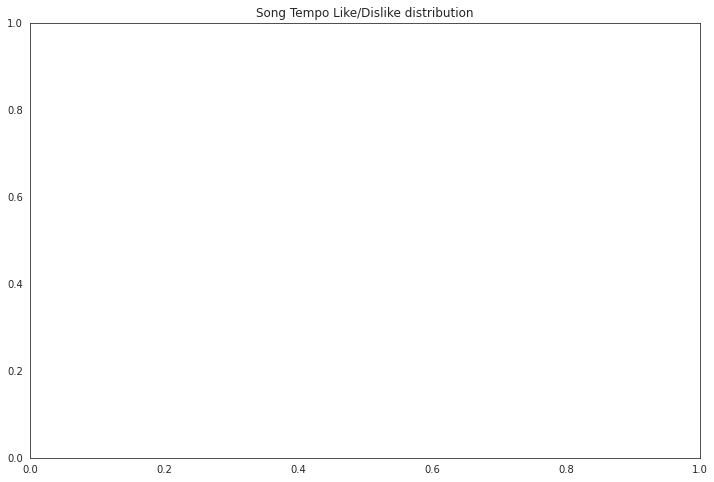

In [125]:
fig = plt.figure(figsize = (12,8))
plt.title("Song Tempo Like/Dislike distribution")

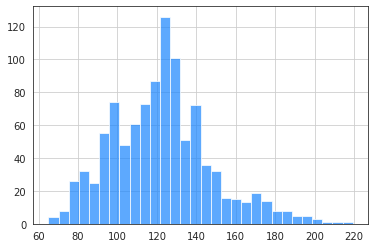

In [126]:
pos_tempo.hist(alpha = 0.7, bins= 30, label= 'positive')

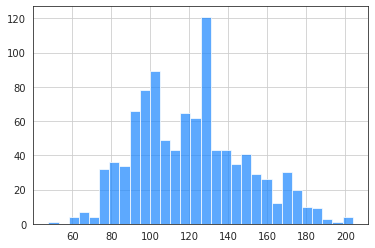

In [127]:
neg_tempo.hist(alpha = 0.7, bins= 30, label= 'negative')

No handles with labels found to put in legend.


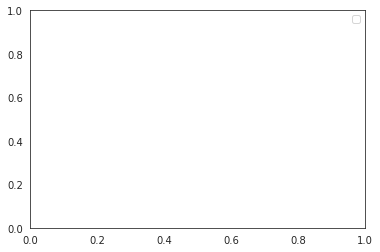

In [128]:
plt.legend(loc = 'upper right')

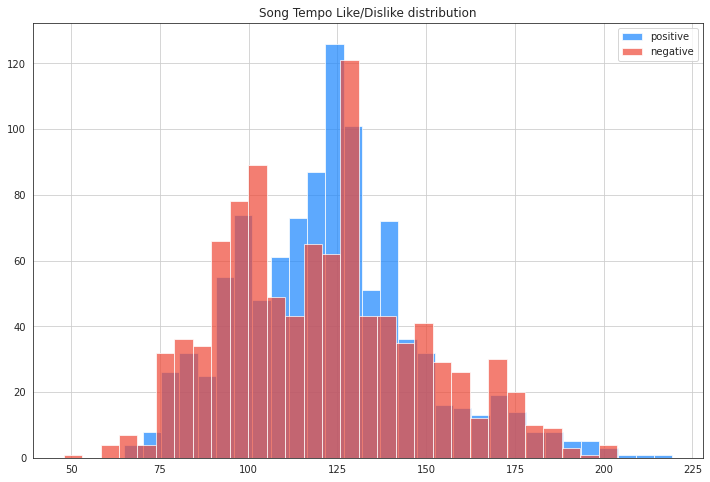

In [129]:
fig = plt.figure(figsize = (12,8))
plt.title("Song Tempo Like/Dislike distribution")
pos_tempo.hist(alpha = 0.7, bins= 30, label= 'positive')
neg_tempo.hist(alpha = 0.7, bins= 30, label= 'negative')
plt.legend(loc = 'upper right')

In [130]:
print(data.columns)

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


In [131]:
fig2 = plt.figure(figsize= (15,15))

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


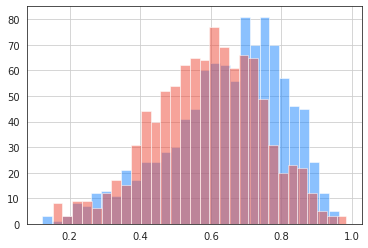

In [132]:
#Danceability

ax3 = fig2.add_subplot(331)
#ax3.set_xlabel('danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like/dislke Distribution')
pos_dance.hist(alpha = 0.5, bins = 30)

ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins= 30)

In [0]:
#Instrumentalness

#ax17 =fig2.add_subplot(339)

In [0]:
c = DecisionTreeClassifier(min_samples_split=100)

In [0]:
features = ['danceability', 'loudness', 'valence', 'instrumentalness','acousticness', 'key',  'speechiness','duration_ms'  ]

In [0]:
X_train = train[features]
y_train = train['target']

X_test = test[features]
y_test = test['target']

In [138]:
print(X_train)

      danceability  loudness  valence  ...  key  speechiness  duration_ms
437          0.633    -4.158    0.455  ...    9       0.0369       264000
1558         0.428    -8.885    0.221  ...    0       0.0340       240093
1303         0.296    -2.999    0.231  ...   11       0.1690       229859
1770         0.662    -8.238    0.652  ...    5       0.1180       223440
164          0.557    -7.657    0.211  ...    5       0.0862       293910
...            ...       ...      ...  ...  ...          ...          ...
232          0.614    -8.850    0.944  ...    2       0.0859       286315
410          0.896    -8.350    0.847  ...    0       0.1270       474040
1588         0.567    -9.450    0.598  ...    2       0.1580       160133
1304         0.474    -3.539    0.142  ...    2       0.1460       260706
829          0.610    -7.436    0.925  ...    7       0.3050       178560

[1714 rows x 8 columns]


In [139]:
print(y_train)

437     1
1558    0
1303    0
1770    0
164     1
       ..
232     1
410     1
1588    0
1304    0
829     1
Name: target, Length: 1714, dtype: int64


In [140]:
print(X_test)

      danceability  loudness  valence  ...  key  speechiness  duration_ms
941          0.815   -12.588    0.616  ...   10       0.0906       489750
1663         0.608    -3.631    0.326  ...    0       0.0765       219398
650          0.836    -5.672    0.658  ...    7       0.0677       230627
903          0.803   -10.819    0.451  ...    8       0.0509       316373
1834         0.632    -6.126    0.450  ...    6       0.0313       249147
...            ...       ...      ...  ...  ...          ...          ...
879          0.582    -6.987    0.638  ...    6       0.0675       302120
1345         0.379    -3.770    0.156  ...    9       0.1070       256114
1610         0.624    -6.372    0.292  ...    4       0.0273       187838
1449         0.559    -3.923    0.474  ...   11       0.0360       210968
767          0.541    -4.908    0.721  ...    2       0.1070       308360

[303 rows x 8 columns]


In [141]:
print(y_test)

941     1
1663    0
650     1
903     1
1834    0
       ..
879     1
1345    0
1610    0
1449    0
767     1
Name: target, Length: 303, dtype: int64


In [0]:
dt = c.fit(X_train,y_train)

In [143]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [144]:
print(type(dt))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [155]:
!pip install pillow

In [161]:
import pillow as pl

ModuleNotFoundError: ignored

In [0]:
import cv2

In [0]:
def show_tree(tree, features, path):
  f = io.StringIO()
  export_graphviz(tree, out_file = f, feature_names= features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = cv2.imread(path) 
  #plt.rcParams['fig.figsize'] = (20,20)
  plt.imshow(img)

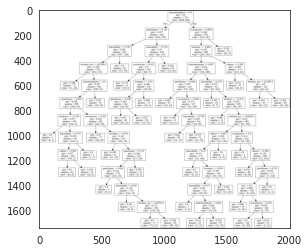

In [182]:
show_tree(dt,features,'dec_tree-01.png')

In [0]:
def show_tree(tree, features, path):
  f = io.StringIO()
  export_graphviz(tree, out_file = f, feature_names= features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = misc.imageio.imread(path) 
  #plt.rcParams['fig.figsize'] = [20,20
  plt.imshow(img)

In [178]:
show_tree(dt,features,'dec_tree-01.png')

AttributeError: ignored